## サンプルデータを読み込む

In [2]:
import pandas as pd

# 鹿島建設の読み取り
df1812 = pd.read_csv('stock_data/1812.csv', index_col='Date', parse_dates=True, dtype=float)
df1812 = df1812.dropna() # 無効なデータ行を削除
df1812.head()

,Open,Hight,Low,Close,Volume,Adj Close
Date,,,,,,
1983-01-04,335.0,335.0,334.0,335.0,50000.0,289.4
1983-01-05,339.0,339.0,330.0,330.0,112000.0,285.1
1983-01-06,331.0,335.0,330.0,332.0,59000.0,286.8
1983-01-07,333.0,333.0,332.0,333.0,110000.0,287.7
1983-01-08,332.0,332.0,326.0,330.0,115000.0,285.1


In [3]:
# 清水建設の読み取り
df1803 = pd.read_csv('stock_data/1803.csv', index_col='Date', parse_dates=True, dtype=float)
df1803 = df1803.dropna() # 無効なデータ行を削除
df1803.head()

,Open,Hight,Low,Close,Volume,Adj Close
Date,,,,,,
1983-01-04,232.0,235.0,232.0,233.0,132000.0,233.0
1983-01-05,233.0,235.0,232.0,232.0,218000.0,232.0
1983-01-06,232.0,233.0,232.0,233.0,186000.0,233.0
1983-01-07,233.0,235.0,232.0,234.0,214000.0,234.0
1983-01-08,232.0,235.0,232.0,235.0,317000.0,235.0


## ２つの銘柄の相関を調べる

In [7]:
import matplotlib.pyplot as plt

port=pd.concat([df1812.Close, df1803.Close], axis=1, keys=['1812', '1803']).dropna()

print(port)

# ２つの銘柄を連結すると時間がそろう

              1812    1803
Date                      
1983-01-04   335.0   233.0
1983-01-05   330.0   232.0
1983-01-06   332.0   233.0
1983-01-07   333.0   234.0
1983-01-08   330.0   235.0
1983-01-10   333.0   236.0
1983-01-11   338.0   235.0
1983-01-12   335.0   235.0
1983-01-13   333.0   231.0
1983-01-14   339.0   231.0
1983-01-17   338.0   232.0
1983-01-18   336.0   234.0
1983-01-19   334.0   233.0
1983-01-20   330.0   230.0
1983-01-21   340.0   230.0
1983-01-22   331.0   232.0
1983-01-24   329.0   228.0
1983-01-25   329.0   225.0
1983-01-26   329.0   226.0
1983-01-27   328.0   225.0
1983-01-28   327.0   226.0
1983-01-29   327.0   228.0
1983-01-31   330.0   230.0
1983-02-01   329.0   230.0
1983-02-02   330.0   232.0
1983-02-03   330.0   231.0
1983-02-04   328.0   230.0
1983-02-05   329.0   231.0
1983-02-07   330.0   230.0
1983-02-08   328.0   229.0
...            ...     ...
2018-10-03  1611.0  1010.0
2018-10-04  1607.0  1014.0
2018-10-05  1616.0  1014.0
2018-10-09  1609.0  1011.0
2

## ２つの銘柄の相関を（ここでは 価格ではなく 変化率が似ているか）調べる。

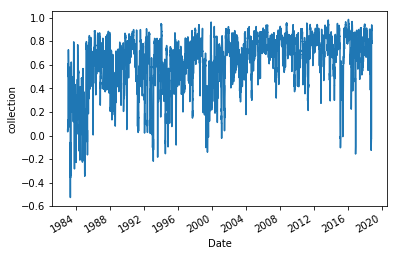

In [8]:
# .pct_change() は価格を変化率に換算している
n= port['1812'].pct_change().dropna()
f= port['1803'].pct_change().dropna()

# f から移動相関を計算しそれをグラフに表示している
# window は期間を表している この場合は日足を用いているので 20日分のデータを用いている
f.rolling(window=20).corr(n).plot()
plt.ylabel('collection')
plt.show()

- 相関は -1 から 1 の間の値を取る
- 相関が１のときは２つの値が同じ方向の相関がある
- 相関が-１のときは２つの値が逆方向の相関がある
- 相関が 0の時は 相関がない

したがって　鹿島建設(1812)と清水建設(1803) は上図より
同じ方向の相関が強い